## <center>Iris Dataset</center>
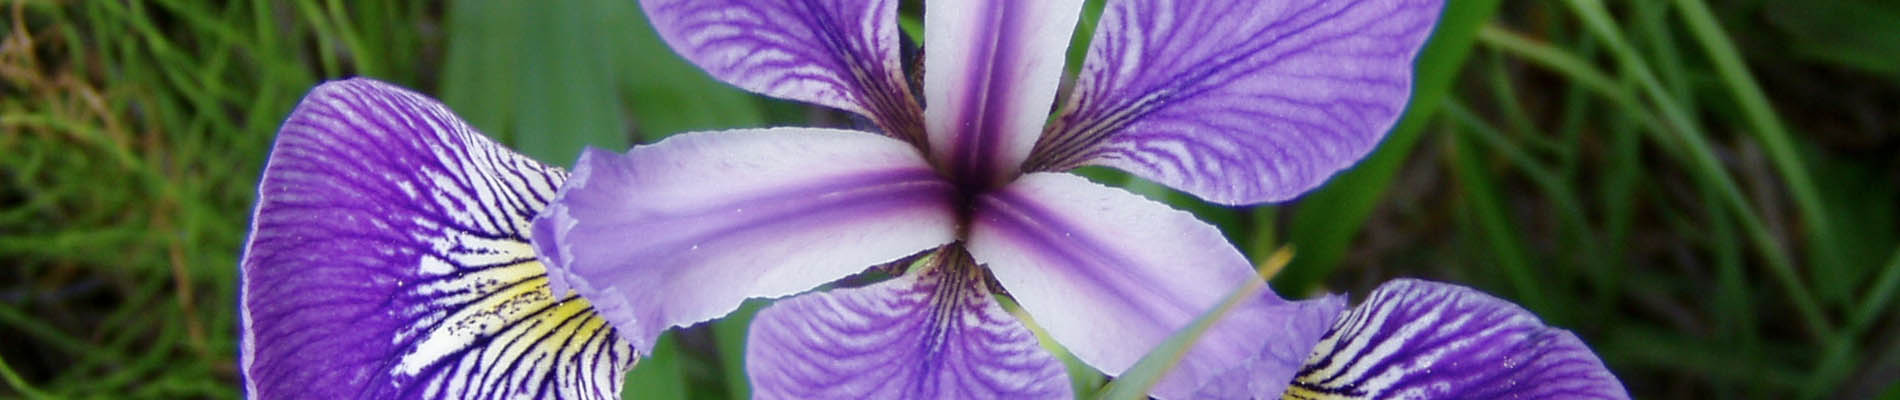
#### Classification
* [Imports and Basic Exploration](#imports)
* [Data Visualizations](#visualization)
* [Splitting Dataset and ML Models](#ml-models)


## Imports and Basic Exploration <a class="anchor" id="imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv", index_col="Id")

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Data Visualizations <a class="anchor" id="visualization"></a>

In [9]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

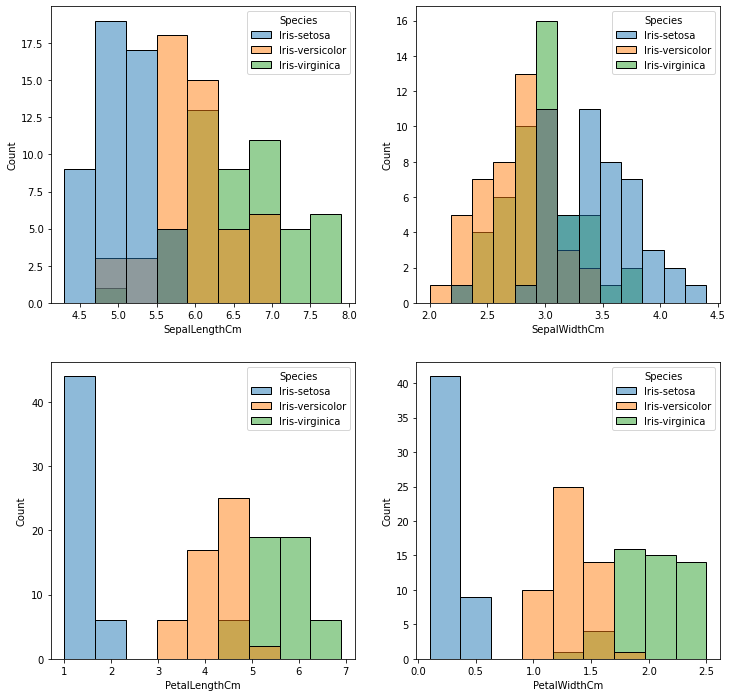

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for col, ax in zip(iris.columns, axes.flat):
    sns.histplot(data=iris, x=col, hue="Species", ax=ax)
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

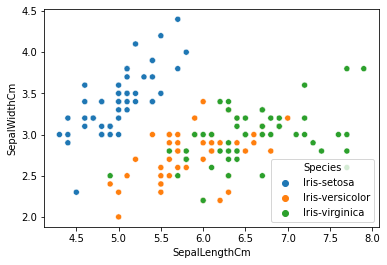

In [11]:
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

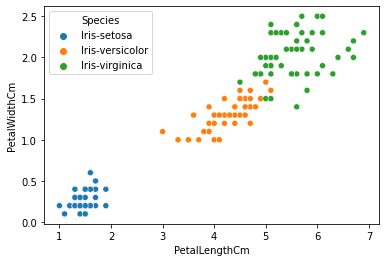

In [12]:
sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

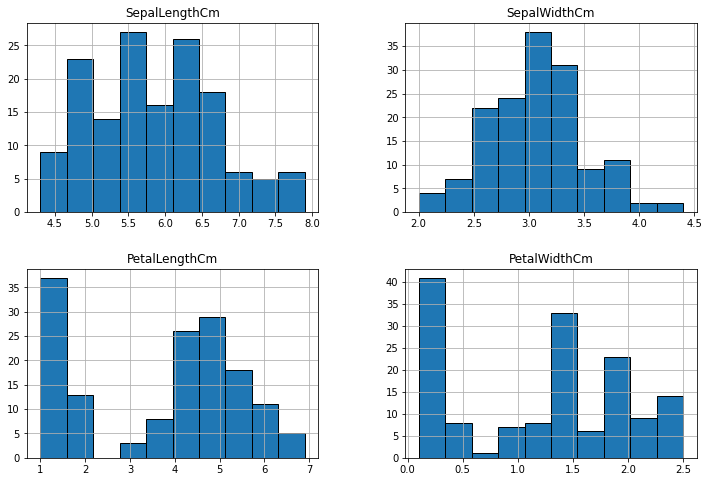

In [13]:
iris.hist(edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

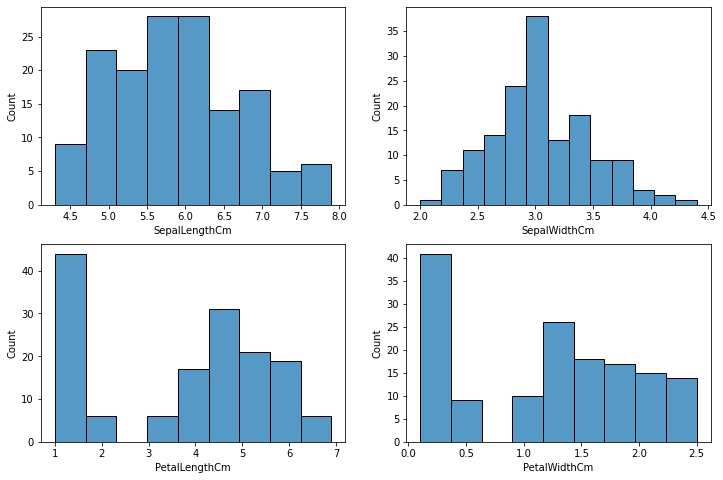

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
#sns.set_style("darkgrid")
for col, ax in zip(iris.columns, axes.flat):
    sns.histplot(data=iris, x=col, ax=ax)
plt.show()

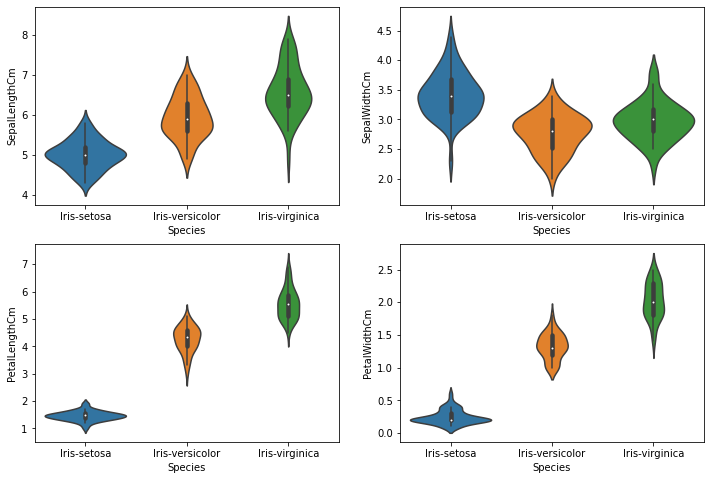

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style("darkgrid")
for col, ax in zip(iris.columns, axes.flat):
    sns.violinplot(data=iris, x="Species", y=col, ax=ax)
plt.show()

<AxesSubplot:>

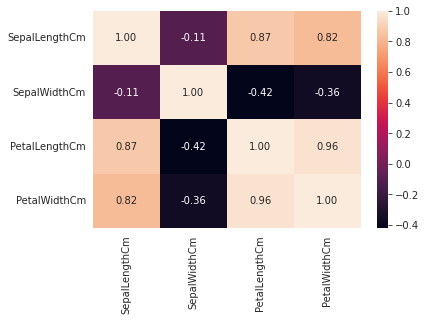

In [16]:
sns.heatmap(data=iris.corr(), annot=True, fmt=".2f")

## Splitting Dataset and ML Models <a class="anchor" id="ml-models"></a>

In [17]:
X = iris.copy()
y = X.Species
X.drop("Species", axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [19]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Logistic Regression accuracy score is:  0.9666666666666667


<AxesSubplot:>

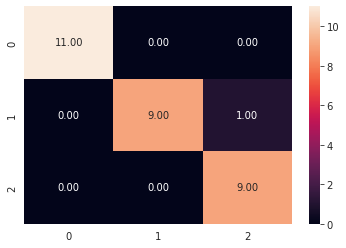

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(X_train, y_train)
y_preds = lr_model.predict(X_test)
print("Logistic Regression accuracy score is: ", accuracy_score(y_test, y_preds))
sns.heatmap(data=confusion_matrix(y_test, y_preds), annot=True, fmt=".2f")

SVC accuracy score is:  0.9666666666666667


<AxesSubplot:>

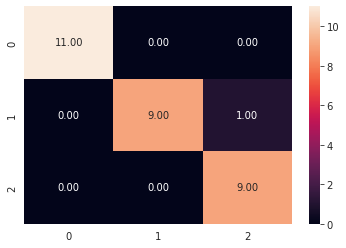

In [21]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_preds = svc_model.predict(X_test)
print("SVC accuracy score is: ", accuracy_score(y_test, y_preds))
sns.heatmap(data=confusion_matrix(y_test, y_preds), annot=True, fmt=".2f")

K Neighbors accuracy score is:  0.9333333333333333


<AxesSubplot:>

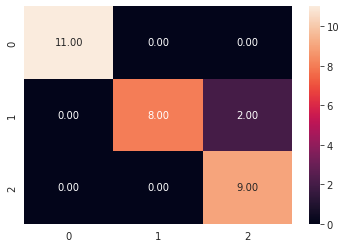

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_preds = knn_model.predict(X_test)
print("K Neighbors accuracy score is: ", accuracy_score(y_test, y_preds))
sns.heatmap(data=confusion_matrix(y_test, y_preds), annot=True, fmt=".2f")